In [1]:
%%writefile dtw.py
import numpy as np


def dtw(p: list, q: list):
    # create empty cost matrix
    cost_m = [[0 for _ in range(len(q))] for _ in range(len(p))]

    # заполним матрицу
    cost_m[0][0] = abs(p[0] - q[0])
    for col in range(0, len(q)):

        if col != 0:
            cost_m[0][col] = abs(p[0] - q[col]) + cost_m[0][col - 1]

        for row in range(1, len(p)):
            if col == 0:
                cost_m[row][col] = abs(p[row] - q[col]) + cost_m[row - 1][col]
                continue

            cost_m[row][col] = \
                abs(p[row] - q[col]) + \
                min(cost_m[row - 1][col - 1], cost_m[row - 1][col], cost_m[row][col - 1])
            
    # wraping path identification
    row, col = len(p) - 1, len(q) - 1
    d = []
    d.append(cost_m[row][col])

    while row > 0 or col > 0:
        neighbors = [float("inf"), float("inf"), float("inf")]
        if row > 0 and col > 0:
            neighbors[2] = cost_m[row - 1][col - 1]
        if row > 0:
            neighbors[1] = cost_m[row - 1][col]
        if col > 0:
            neighbors[0] = cost_m[row][col - 1]
        idx = np.argmin(neighbors) + 1
        step = (idx // 2, idx % 2)
        row, col = row - step[0], col - step[1]
        d.append (cost_m[row][col])     

    return sum(d) / len(d), d, cost_m


Overwriting dtw.py


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from dtw import dtw

%matplotlib inline

[15, 15, 14, 13, 11, 9, 8, 8, 4, 4, 3, 0]
8.666666666666666


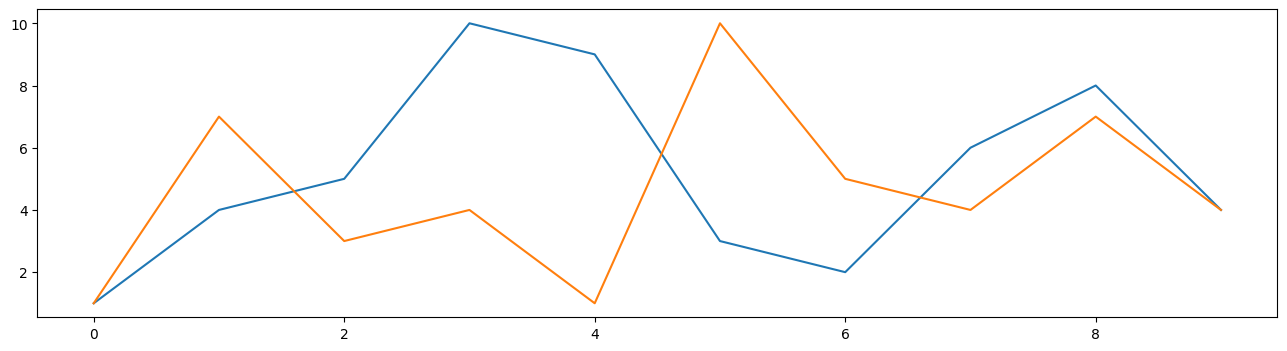

In [13]:
p = [1, 4, 5, 10, 9, 3, 2, 6, 8, 4]
q = [1, 7, 3, 4, 1, 10, 5, 4, 7, 4]

fig, ax = plt.subplots(figsize=(16, 4))
sns.lineplot(x=range(len(p)), y=p, ax=ax)
sns.lineplot(x=range(len(q)), y=q, ax=ax)

dist, path, _ = dtw(p, q)

print(path)
print(dist)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0


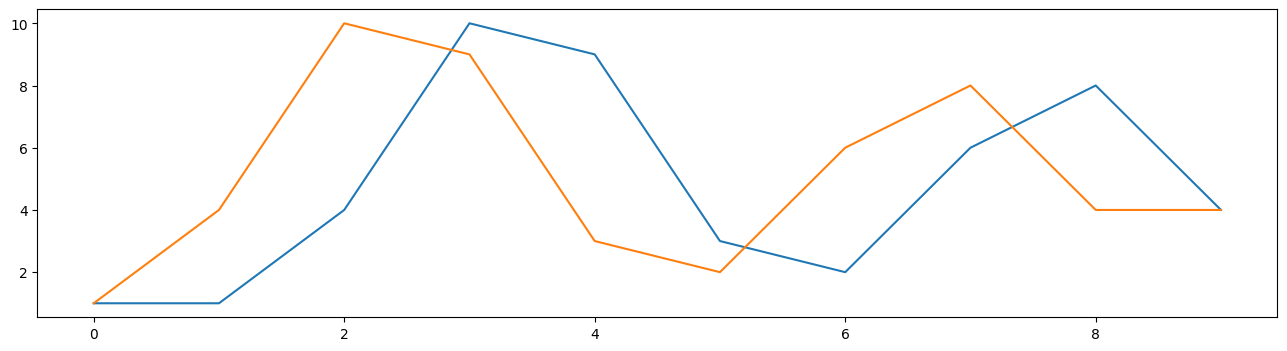

In [14]:
p = [1, 1, 4, 10, 9, 3, 2, 6, 8, 4]
q = [1, 4, 10, 9, 3, 2, 6, 8, 4, 4]

fig, ax = plt.subplots(figsize=(16, 4))
sns.lineplot(x=range(len(p)), y=p, ax=ax)
sns.lineplot(x=range(len(q)), y=q, ax=ax)

dist, path, _ = dtw(p, q)

print(path)
print(dist)